<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Copy_of_Copy_of_Day_9_Sound_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

!cp gdrive/MyDrive/DS404/DS404_Classwork/Day_2_Materials/imports.py .
!cp gdrive/MyDrive/DS404/DS404_Classwork/Day_9_Materials/* .
!ls

Mounted at /content/gdrive
'Copy of apple.jpeg'		 'Copy of book_page.png'  'Copy of ML_folks.jpg'   imports.py
'Copy of bcn_manifestation.jpg'  'Copy of count.wav'	   gdrive		   sample_data


In [ ]:
%run imports.py

<Figure size 432x288 with 0 Axes>

# Sound

In [ ]:
count_wav_path = 'Copy of count.wav'

In [ ]:
import IPython.display as ipd
ipd.Audio(count_wav_path)

In [ ]:
import librosa

In [ ]:
y, sr = librosa.load(count_wav_path)

In [ ]:
y

array([ 1.6235416e-07,  4.9782267e-07, -7.3169292e-07, ...,
        3.4997560e-05,  3.1354248e-05,  0.0000000e+00], dtype=float32)

In [ ]:
y.shape

(129390,)

In [ ]:
sr

22050

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

<ipython-input-11-f2c564302267>:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr, x_axis = 's')


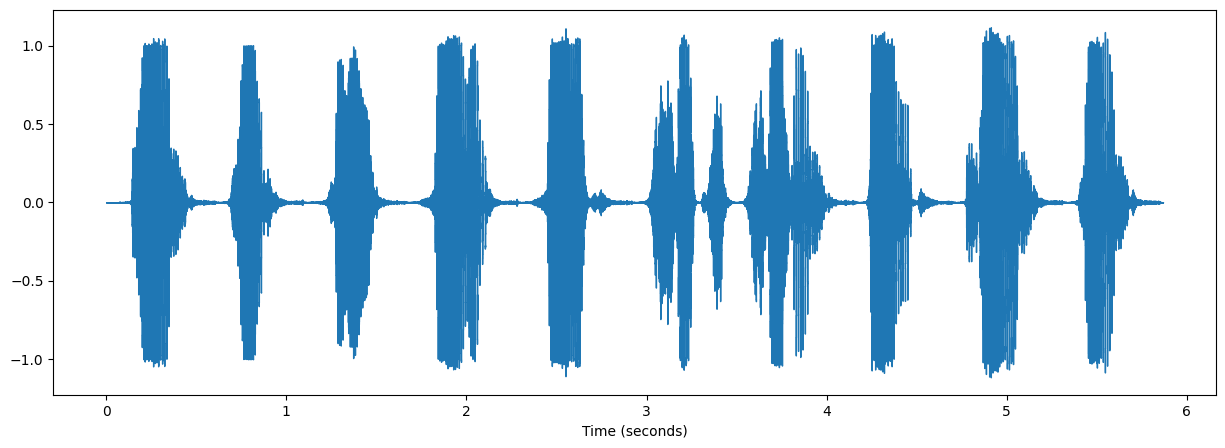

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, x_axis = 's')

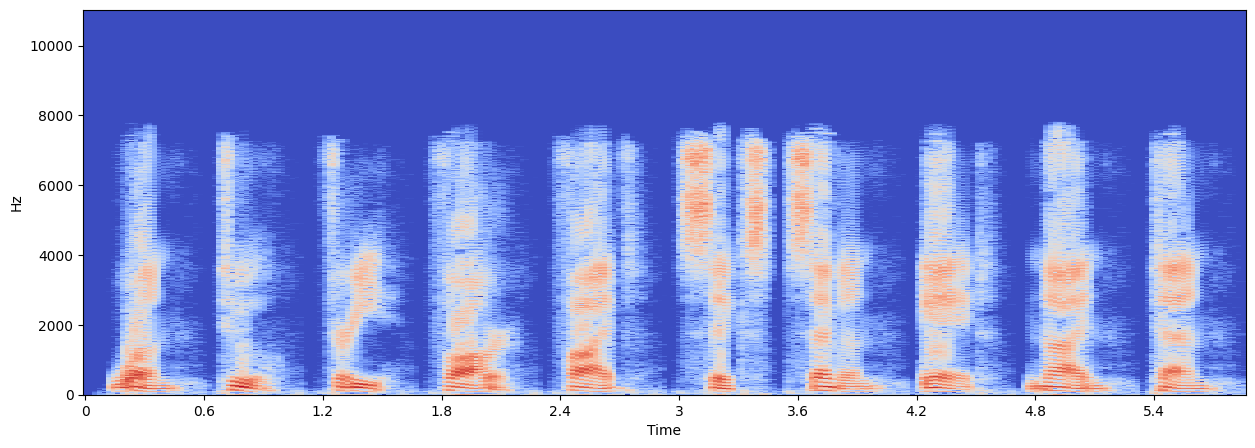

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
Xdb.shape, type(Xdb), 1025*253

((1025, 253), numpy.ndarray, 259325)

In [ ]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [ ]:
ipd.Audio(y_harmonic, rate=sr)

In [ ]:
ipd.Audio(y_percussive, rate=sr)

In [ ]:
# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr,
                                             trim = False)

tempo

107.666015625

In [ ]:
beat_frames_seconds = librosa.frames_to_time(beat_frames, sr=sr)
beat_frames_seconds

array([0.23219955, 0.71981859, 1.27709751, 1.85759637, 2.46131519,
       3.08825397, 3.71519274, 4.27247166, 4.87619048, 5.43346939])

<ipython-input-21-74ea34bff8b5>:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr, x_axis = 's')


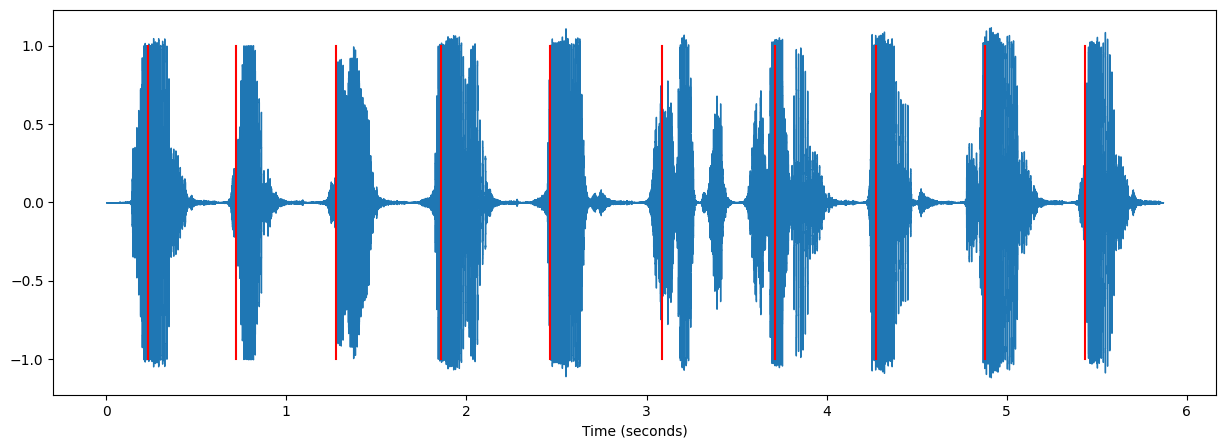

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, x_axis = 's')
for beat_frame in beat_frames_seconds:
    plt.plot([ beat_frame, beat_frame], [-1,1], color = 'red')

#### Plain sound synthesys

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 2.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
y = 0.5*np.sin(2*np.pi*440*t)                # pure sine wave at 440 Hz

In [ ]:
ipd.Audio(y, rate=sr) # load a NumPy array

In [ ]:
import soundfile as sf
sf.write('tone_440.wav', y, sr)

# Speech recognition

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 34.5 MB/s eta 0:00:00


In [ ]:
import speech_recognition

recognizer = speech_recognition.Recognizer()
with speech_recognition.AudioFile(count_wav_path) as source:
    audio = recognizer.record(source)

In [ ]:
audio

### Sphinx recognition

In [ ]:
!pip install pocketsphinx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 28.7 MB/s eta 0:00:00


In [ ]:
print(recognizer.recognize_sphinx(audio))

one two three four five six seven eight nine ten


### Google recognition

In [ ]:
print(recognizer.recognize_google(audio))

1 2 3 4 5 6 7 8 9 10


Full list of audio_recognition examples

https://github.com/Uberi/speech_recognition/blob/master/examples/audio_transcribe.py


Python lib for audio analysis
https://github.com/tyiannak/pyAudioAnalysis.git